In [ ]:
#IN ORDER TO COMPLETE THE TASK 1:DATA CLEANING AND PREPROCESSING
#WE NEED TO CREATE Messy Dataset Generator (10000 Rows)

In [1]:
import pandas as pd
import random
import numpy as np

names = ["John Doe", "jane smith", "RAHUL", "Aisha", "Arun", "Meena", "Karthik", "Priya", "Ramesh", "Anu", "Vijay", "Sneha", "Kiran","Niyaz","Mohan",""]
cities = ["Chennai", "chennai", " Bangalore ", "Delhi", "Mumbai", "Hyderabad", "Madurai", "Trichy", "Coimbatore", "Cuddalore",""]
genders = ["Male", "Female", "male", "FEMALE", "", None]

wrong_dates = [
    "2023-01-15",
    "15-02-2023",
    "2023/03/10",
    "2023.04.05",
    "2023-13-40",      # invalid date
    "32/01/2023",      # invalid
    "20230115",
    "Jan 15 2023",
    ""
]

data = []

for i in range(10000):
    row = {
        "CustomerID": random.choice([i+100, i+100, i+100, 110]),  # duplicates
        "Name": random.choice(names),
        "Age": random.choice([25, 27, 30, 35, None, "twenty", "28 ", ""]),
        "Gender": random.choice(genders),
        "City": random.choice(cities),
        "JoinDate": random.choice(wrong_dates),
        "PurchaseAmount": random.choice([1200, 1500, 1800, 2000, 2500, None, "abc", "1700 "])
    }
    data.append(row)

df = pd.DataFrame(data)

df.to_csv("messy_dataset.csv", index=False)

df.head()


,CustomerID,Name,Age,Gender,City,JoinDate,PurchaseAmount
0,100,Priya,twenty,None,Mumbai,,2000
1,101,Kiran,27,Female,Trichy,15-02-2023,1700
2,102,Meena,None,Male,chennai,15-02-2023,1500
3,103,Sneha,,None,Delhi,2023-01-15,None
4,104,Aisha,35,Female,Cuddalore,20230115,1700


In [4]:
#WE HAVE CREATED THE MESSY DATA THAT NEEDS TO CLEAN DUPLICATES,FORMATING,REMOVE NULL VALUES

In [5]:
#Data Cleaning & Preprocessing Pipeline
#Step 1 — Load Dataset

In [2]:

df = pd.read_csv("messy_dataset.csv")
df.head()


,CustomerID,Name,Age,Gender,City,JoinDate,PurchaseAmount
0,100,Priya,twenty,NaN,Mumbai,NaN,2000
1,101,Kiran,27,Female,Trichy,15-02-2023,1700
2,102,Meena,NaN,Male,chennai,15-02-2023,1500
3,103,Sneha,NaN,NaN,Delhi,2023-01-15,NaN
4,104,Aisha,35,Female,Cuddalore,20230115,1700


In [3]:
#Step 2 — Initial Inspection
df.info()
df.isnull().sum()

df.duplicated().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      10000 non-null  int64 
 1   Name            9414 non-null   object
 2   Age             7506 non-null   object
 3   Gender          6601 non-null   object
 4   City            9105 non-null   object
 5   JoinDate        8899 non-null   object
 6   PurchaseAmount  8749 non-null   object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


np.int64(9)

In [4]:
#Step 4: Standardize Text Columns
df["Name"] = df["Name"].str.strip().str.title()
df["City"] = df["City"].str.strip().str.title()
df["Gender"] = df["Gender"].str.strip().str.lower()


In [5]:
#Step 5: Convert Age to Numeric
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")


In [6]:
#Step 6: Convert PurchaseAmount to Numeric
df["PurchaseAmount"] = pd.to_numeric(df["PurchaseAmount"], errors="coerce")


In [7]:
#Step 7: Convert JoinDate to Datetime
df["JoinDate"] = pd.to_datetime(df["JoinDate"], format="%Y-%m-%d", errors="coerce")





In [8]:
#Step 8: Handle Missing Values
df["Age"] = df["Age"].fillna(df["Age"].median())

df["PurchaseAmount"] = df["PurchaseAmount"].fillna(df["PurchaseAmount"].median())

df["Name"]=df["Name"].replace("", np.nan)
df["Name"] = df["Name"].fillna(df["Name"].mode()[0])

df["Gender"] = df["Gender"].replace("", np.nan)
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

df["City"] = df["City"].replace("", np.nan)
df["City"] = df["City"].fillna(df["City"].mode()[0])

df["JoinDate"] = df["JoinDate"].fillna(df["JoinDate"].mode()[0])


In [9]:
#Step 9: Remove Duplicate Records
df.drop_duplicates(inplace=True)


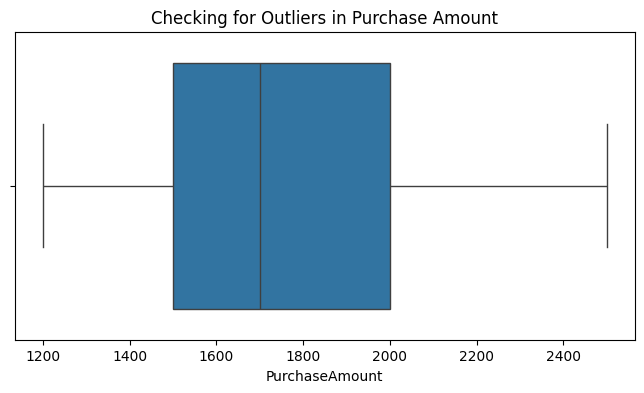

In [10]:
#Step 10: Outlier Handling (IQR Method)
for col in ["Age", "PurchaseAmount"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["PurchaseAmount"])
plt.title("Checking for Outliers in Purchase Amount")
plt.show()



In [11]:
#Step 11: Final Validation
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 8094 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      8094 non-null   int64         
 1   Name            8094 non-null   object        
 2   Age             8094 non-null   float64       
 3   Gender          8094 non-null   object        
 4   City            8094 non-null   object        
 5   JoinDate        8094 non-null   datetime64[ns]
 6   PurchaseAmount  8094 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 505.9+ KB


CustomerID        0
Name              0
Age               0
Gender            0
City              0
JoinDate          0
PurchaseAmount    0
dtype: int64

In [12]:
#Step 12: Save Cleaned Dataset
df.to_csv("cleaned_dataset.csv", index=False)
